In [ ]:
import Pkg; Pkg.add("InfrastructureSystems")
import Pkg
Pkg.update("PowerSimulationsDynamics")
Pkg.update("PowerSystems")
Pkg.update()

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
   Installed OrdinaryDiffEqSSPRK ──────── v1.2.1
   Installed Cairo_jll ────────────────── v1.18.4+0
   Installed SteadyStateDiffEq ────────── v2.5.0
   Installed HypergeometricFunctions ──── v0.3.28
   Installed DifferentialEquations ────── v7.16.1
   Installed RecursiveArrayTools ──────── v3.31.1
   Installed NonlinearSolve ───────────── v4.5.0
   Installed MathOptInterface ─────────── v1.38.0
   Installed BracketingNonlinea

In [39]:
using PowerSystemCaseBuilder
using PowerSimulationsDynamics
using PowerNetworkMatrices
using Plots
using Sundials
using InfrastructureSystems

using PowerSystems

In [3]:
sys = build_system(PSIDTestSystems, "psid_test_threebus_multimachine_dynlines")
sys

┌ Warning: struct DynamicBranch does not exist in validation configuration file, validation skipped
└ @ InfrastructureSystems /home/muhyeddin/.julia/packages/InfrastructureSystems/9btGb/src/validation.jl:51
┌ Warning: struct DynamicBranch does not exist in validation configuration file, validation skipped
└ @ InfrastructureSystems /home/muhyeddin/.julia/packages/InfrastructureSystems/9btGb/src/validation.jl:51
┌ Warning: struct DynamicBranch does not exist in validation configuration file, validation skipped
└ @ InfrastructureSystems /home/muhyeddin/.julia/packages/InfrastructureSystems/9btGb/src/validation.jl:51
┌ Warning: struct DynamicGenerator does not exist in validation configuration file, validation skipped
└ @ InfrastructureSystems /home/muhyeddin/.julia/packages/InfrastructureSystems/9btGb/src/validation.jl:51
┌ Warning: struct DynamicGenerator does not exist in validation configuration file, validation skipped
└ @ InfrastructureSystems /home/muhyeddin/.julia/packages/Infrastr

System
┌───────────────────┬─────────────┐
│ Property          │ Value       │
├───────────────────┼─────────────┤
│ Name              │             │
│ Description       │             │
│ System Units Base │ SYSTEM_BASE │
│ Base Power        │ 100.0       │
│ Base Frequency    │ 60.0        │
│ Num Components    │ 16          │
└───────────────────┴─────────────┘

Static Components
┌─────────────────┬───────┬────────────────────────┬───────────────┐
│ Type            │ Count │ Has Static Time Series │ Has Forecasts │
├─────────────────┼───────┼────────────────────────┼───────────────┤
│ ACBus           │ 3     │ false                  │ false         │
│ Arc             │ 3     │ false                  │ false         │
│ Area            │ 1     │ false                  │ false         │
│ DynamicBranch   │ 3     │ false                  │ false         │
│ LoadZone        │ 1     │ false                  │ false         │
│ StandardLoad    │ 1     │ false                  │ false         │
│ ThermalStandard │ 2     │ false                  │ false         │
└─────────────────┴───────┴────────────────────────┴───────────────┘

Dynamic Components
┌──────────────────┬───────┐
│ Type             │ Count │
├──────────────────┼───────┤
│ DynamicGenerator │ 1     │
│ DynamicGenerator │ 1     │
└──────────────────┴───────┘

In [51]:
gens = collect(get_components(ThermalStandard, sys))
gen1 = gens[1]
gen2 = gens[2]

generator-101-1 (ThermalStandard):
   name: generator-101-1
   available: true
   status: true
   bus: BUS 1 (ACBus)
   active_power: 0.0
   reactive_power: 0.0
   rating: 1.8027756377319946
   active_power_limits: (min = 0.0, max = 1.5)
   reactive_power_limits: (min = -1.0, max = 1.0)
   ramp_limits: (up = 1.5, down = 1.5)
   operation_cost: ThreePartCost
   base_power: 100.0
   time_limits: nothing
   must_run: false
   prime_mover_type: PrimeMovers.OT = 19
   fuel: ThermalFuels.OTHER = 14
   services: 0-element Vector{Service}
   time_at_status: 10000.0
   dynamic_injector: generator-101-1 (DynamicGenerator{MarconatoMachine, SingleMass, AVRSimple, TGTypeII, PSSFixed})
   ext: Dict{String, Any}("z_source" => Dict{String, Any}("x" => 1, "r" => 0))
   time_series_container: 
   InfrastructureSystems.SystemUnitsSettings:
      base_value: 100.0
      unit_system: UnitSystem.SYSTEM_BASE = 0

In [52]:
sp_machine = SauerPaiMachine(
    0.002, # R
    1.79, # Xd
    1.71, # Xq
    0.169, # Xd_p
    0.228, # Xq_p
    0.135, # Xd_pp
    0.2, # Xq_pp
    0.13, # Xl
    4.3, # Td0_p
    0.85, # Tq0_p 
    0.032, # Td0_pp
    0.05, # Tq0_pp
    # γ_d1 = ,
    # γ_q1 = ,
    # γ_d2 = ,
    # γ_q2 = ,
    Dict("S10" => 0.0, "S12" => 0.0),
    3.148, # H
    2.0, # D
    1.0,    # ω_ref (typically 1.0 pu)
    60.0,   # frequency (Hz)
    [:δ, :ω, :Eqp, :Edp, :psikd, :psikq],  # state names
    6,      # number of states
    InfrastructureSystems.InfrastructureSystemsInternal()
)
# inf_bus = PowerSimulationsDynamics.InfiniteBus()

SauerPaiMachine(0.002, 1.79, 1.71, 0.169, 0.228, 0.135, 0.2, 0.13, 4.3, 0.85, 0.032, 0.05, Dict{String, Any}("S10" => 0.0, "S12" => 0.0), 3.148, 2.0, 1.0, 60.0, [:δ, :ω, :Eqp, :Edp, :psikd, :psikq], 6, InfrastructureSystems.InfrastructureSystemsInternal(Base.UUID("7c8c5c54-ef9b-4765-ab8b-76b1b5d2087a"), nothing, nothing))

In [109]:
methods(PSY.EXST1)


# 7 methods for type constructor:
 [1] PowerSystems.EXST1(Tr::Float64, Vi_lim::@NamedTuple{min::Float64, max::Float64}, Tc::Float64, Tb::Float64, Ka::Float64, Ta::Float64, Vr_lim::@NamedTuple{min::Float64, max::Float64}, Kc::Float64, Kf::Float64, Tf::Float64, V_ref::Float64, ext::Dict{String, Any}, states::Vector{Symbol}, n_states::Int64, internal::InfrastructureSystems.InfrastructureSystemsInternal)
     @ ~/.julia/packages/PowerSystems/xh3fM/src/models/generated/EXST1.jl:50
 [2] PowerSystems.EXST1(Tr, Vi_lim, Tc, Tb, Ka, Ta, Vr_lim, Kc, Kf, Tf, V_ref, ext, states, n_states, internal)
     @ ~/.julia/packages/PowerSystems/xh3fM/src/models/generated/EXST1.jl:50
 [3] PowerSystems.EXST1(Tr, Vi_lim, Tc, Tb, Ka, Ta, Vr_lim, Kc, Kf, Tf)
     @ ~/.julia/packages/PowerSystems/xh3fM/src/models/generated/EXST1.jl:85
 [4] PowerSystems.EXST1(Tr, Vi_lim, Tc, Tb, Ka, Ta, Vr_lim, Kc, Kf, Tf, V_ref)
     @ ~/.julia/packages/PowerSystems/xh3fM/src/models/generated/EXST1.jl:85
 [5] PowerSystems.EXST1(Tr, Vi_lim, Tc, Tb, Ka, Ta, Vr_lim, Kc, Kf, Tf, V_ref, ext)
     @ ~/.julia/packages/PowerSystems/xh3fM/src/models/generated/EXST1.jl:85
 [6] PowerSystems.EXST1(; Tr, Vi_lim, Tc, Tb, Ka, Ta, Vr_lim, Kc, Kf, Tf, V_ref, ext, states, n_states, internal)
     @ ~/.julia/packages/PowerSystems/xh3fM/src/models/generated/EXST1.jl:89
 [7] PowerSystems.EXST1(::Nothing)
     @ ~/.julia/packages/PowerSystems/xh3fM/src/models/generated/EXST1.jl:94

In [ ]:
const PSY = PowerSystems

shaft_model = SingleMass(    
    H = 3.148,
    D = 2.0,
    )


    
governor = GasTG(
    0.05,    # R
    0.2,     # T1
    0.4,     # T2
    0.04,    # T3
    1.0,     # AT
    2.0,     # Kt
    (0.0, 6.0), # Vlim
    0.0    # D_turb
)


exciter = PSY.EXST1(
    0.001, # Tr
    (0.0, 6.0), # Vi_lim
    400.0, # Tc
    0.02, # Tb
    200, # Ka
    0.8, # Ta
    (-6.0, 6.0), # Vr_limit
    0.0, # Kc
    0.0, # Kf
    0.0, # Tf
    1.0, # V_ref
)

UndefKeywordError: UndefKeywordError: keyword argument `avr` not assigned

In [110]:
methods(DynamicGenerator)

# 5 methods for type constructor:
 [1] DynamicGenerator(; name, ω_ref, machine, shaft, avr, prime_mover, pss, base_power, n_states, states, ext, internal)
     @ ~/.julia/packages/PowerSystems/xh3fM/src/models/dynamic_generator.jl:91
 [2] DynamicGenerator(name::String, ω_ref::Float64, machine::M, shaft::S, avr::A, prime_mover::TG, pss::P, base_power::Float64, n_states::Int64, states::Vector{Symbol}, ext::Dict{String, Any}, internal::InfrastructureSystems.InfrastructureSystemsInternal) where {M<:Machine, S<:Shaft, A<:AVR, TG<:TurbineGov, P<:PSS}
     @ ~/.julia/packages/PowerSystems/xh3fM/src/models/dynamic_generator.jl:47
 [3] DynamicGenerator(name::String, ω_ref::Float64, machine::M, shaft::S, avr::A, prime_mover::TG, pss::P) where {M<:Machine, S<:Shaft, A<:AVR, TG<:TurbineGov, P<:PSS}
     @ ~/.julia/packages/PowerSystems/xh3fM/src/models/dynamic_generator.jl:61
 [4] DynamicGenerator(name::String, ω_ref::Float64, machine::M, shaft::S, avr::A, prime_mover::TG, pss::P, base_power::Float64) where {M<:Machine, S<:Shaft, A<:AVR, TG<:TurbineGov, P<:PSS}
     @ ~/.julia/packages/PowerSystems/xh3fM/src/models/dynamic_generator.jl:61
 [5] DynamicGenerator(name::String, ω_ref::Float64, machine::M, shaft::S, avr::A, prime_mover::TG, pss::P, base_power::Float64, ext::Dict{String, Any}) where {M<:Machine, S<:Shaft, A<:AVR, TG<:TurbineGov, P<:PSS}
     @ ~/.julia/packages/PowerSystems/xh3fM/src/models/dynamic_generator.jl:61

In [143]:
gen2


generator-101-1 (ThermalStandard):
   name: generator-101-1
   available: true
   status: true
   bus: BUS 1 (ACBus)
   active_power: 0.0
   reactive_power: 0.0
   rating: 180.27756377319946
   active_power_limits: (min = 0.0, max = 150.0)
   reactive_power_limits: (min = -100.0, max = 100.0)
   ramp_limits: (up = 150.0, down = 150.0)
   operation_cost: ThreePartCost
   base_power: 100.0
   time_limits: nothing
   must_run: false
   prime_mover_type: PrimeMovers.OT = 19
   fuel: ThermalFuels.OTHER = 14
   services: 0-element Vector{Service}
   time_at_status: 10000.0
   dynamic_injector: nothing
   ext: Dict{String, Any}("z_source" => Dict{String, Any}("x" => 1, "r" => 0))
   time_series_container: 
   internal: InfrastructureSystems.InfrastructureSystemsInternal

┌ Warning: SystemUnitSetting not defined, using NATURAL_UNITS for displaying device specification.
└ @ PowerSystems /home/muhyeddin/.julia/packages/PowerSystems/xh3fM/src/utils/print.jl:192


In [144]:

dg1 = DynamicGenerator(
    name = "generator-101-1",
    ω_ref = 1.0,
    machine = sp_machine,
    shaft = shaft_model,
    avr = exciter,
    prime_mover = governor,
    # exciter = exciter,
    pss = PSY.PSSFixed(V_pss = 0.0),
    base_power = get_base_power(gen2),    
    # InfrastructureSystems.InfrastructureSystemsInternal()
)


generator-101-1 (DynamicGenerator{SauerPaiMachine, SingleMass, PowerSystems.EXST1, GasTG, PSSFixed}):
   name: generator-101-1
   ω_ref: 1.0
   machine: SauerPaiMachine
   shaft: SingleMass
   avr: PowerSystems.EXST1
   prime_mover: GasTG
   pss: PSSFixed
   base_power: 100.0
   n_states: 15
   states: [:δ, :ω, :Eqp, :Edp, :psikd, :psikq, :δ, :ω, :Vm, :Vrll, :Vr, :Vfb, :x_g1, :x_g2, :x_g3]
   ext: Dict{String, Any}()
   internal: InfrastructureSystems.InfrastructureSystemsInternal

┌ Warning: SystemUnitSetting not defined, using NATURAL_UNITS for displaying device specification.
└ @ PowerSystems /home/muhyeddin/.julia/packages/PowerSystems/xh3fM/src/utils/print.jl:192


In [131]:
filter(x -> occursin("PSS", String(x)), names(PSY; all=true))


25-element Vector{Symbol}:
 Symbol("##PSS2A#95")
 Symbol("##PSS2B#96")
 Symbol("##PSS2C#97")
 Symbol("##PSSFixed#91")
 Symbol("##PSSSimple#92")
 Symbol("#PSS2A#95")
 Symbol("#PSS2B#96")
 Symbol("#PSS2C#97")
 Symbol("#PSSFixed#91")
 Symbol("#PSSSimple#92")
 ⋮
 :PSS2B
 :PSS2C
 :PSSE_DYR_MAPPING_FILE
 :PSSFixed
 :PSSSimple
 :get_PSS_Hysteresis_param
 :get_PSS_flags
 :set_PSS_Hysteresis_param!
 :set_PSS_flags!

In [46]:
for name in names(PowerSimulationsDynamics; all=true)
    println(name)
end

##JacobianFunctionWrapper#68
##JacobianFunctionWrapper#73
##JacobianFunctionWrapper#78
##Simulation!#104
##Simulation!#106
##Simulation#103
##Simulation#105
##Simulation#107
##_build!#120
##_execute!#128
##build!#121
##configure_logging#108
##configure_logging#216
##execute!#129
##get_activepower_branch_flow#98
##get_activepower_series#90
##get_field_current_series#92
##get_field_voltage_series#93
##get_frequency_series#100
##get_imaginary_current_branch_flow#97
##get_imaginary_current_series#89
##get_mechanical_torque_series#95
##get_pss_output_series#94
##get_reactivepower_branch_flow#99
##get_reactivepower_series#91
##get_real_current_branch_flow#96
##get_real_current_series#88
##get_state_series#85
##get_voltage_angle_series#87
##get_voltage_magnitude_series#86
##meta#59
##show_results_table#214
##show_simulation_table#215
##small_signal_analysis#149
#1#2
#10#12
#101#102
#109#110
#111#112
#113#114
#118#119
#122#123
#124#126
#125#127
#13#14
#130#131
#132#133
#135#138
#139#140
#141#1

In [136]:
remove_component!(sys, get_dynamic_injector(gen2))
remove_component!(sys, gen2)


In [146]:
add_component!(sys, gen2)

In [147]:
add_component!(sys, dg1, static_injector = gen2)


┌ Warning: struct DynamicGenerator does not exist in validation configuration file, validation skipped
└ @ InfrastructureSystems /home/muhyeddin/.julia/packages/InfrastructureSystems/9btGb/src/validation.jl:51


In [150]:
methods(PowerSimulationsDynamics.init_tg)


UndefVarError: UndefVarError: `init_tg` not defined in `PowerSimulationsDynamics`
Suggestion: check for spelling errors or missing imports.

In [149]:
tspan = (0.0, 30.0)
try
    sim = Simulation(
        ResidualModel,
        sys,
        pwd(),
        tspan
    )
catch e
    println("Simulation error: ", e)
    println(stacktrace(catch_backtrace()))
end


┌ Info: Unit System changed to UnitSystem.DEVICE_BASE = 1
└ @ PowerSystems /home/muhyeddin/.julia/packages/PowerSystems/xh3fM/src/base.jl:395
┌ Error: Initialization of Turbine Governor generator-101-1 failed
└ @ PowerSimulationsDynamics ~/.julia/packages/PowerSimulationsDynamics/wch0a/src/initialization/generator_components/init_tg.jl:155
┌ Error: ResidualModel failed to build
│   exception =
│    UndefVarError: `i` not defined in `PowerSimulationsDynamics`
│    Suggestion: check for spelling errors or missing imports.
│    Stacktrace:
│      [1] check_valid_values(initial_guess::Vector{Float64}, inputs::PowerSimulationsDynamics.SimulationInputs)
│        @ PowerSimulationsDynamics ~/.julia/packages/PowerSimulationsDynamics/wch0a/src/base/simulation_initialization.jl:141
│      [2] _calculate_initial_guess!(x0_init::Vector{Float64}, sim::Simulation{ResidualModel})
│        @ PowerSimulationsDynamics ~/.julia/packages/PowerSimulationsDynamics/wch0a/src/base/simulation_initialization.jl

Property,Value
Status,BUILD_FAILED
Simulation Type,Residual Model
Initialized?,No
Multimachine system?,Yes
Time Span,"(0.0, 30.0)"
Number of States,36
Number of Perturbations,0


In [5]:

execute!(
    sim, #simulation structure
    IDA(), #Sundials DAE Solver
    dtmax = 0.02, #Maximum step size
    )

results = read_results(sim)

Property,Value
System Base Power [MVA],100.0
System Base Frequency [Hz],60.0
Time Span,"(0.0, 30.0)"
Total Time Steps,1501
Number of States,31
Total solve time,4.774868525


In [6]:
results

Property,Value
System Base Power [MVA],100.0
System Base Frequency [Hz],60.0
Time Span,"(0.0, 30.0)"
Total Time Steps,1501
Number of States,31
Total solve time,4.774868525


In [8]:
series2 = get_voltage_magnitude_series(results, 102)

([0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12000000000000001, 0.14, 0.16, 0.18  …  29.819999999999453, 29.839999999999453, 29.859999999999452, 29.879999999999452, 29.89999999999945, 29.91999999999945, 29.93999999999945, 29.95999999999945, 29.97999999999945, 30.0], [1.0142, 1.0142000000000047, 1.0142000000000009, 1.0141999999999933, 1.0141999999999787, 1.0141999999999591, 1.014199999999937, 1.0141999999999183, 1.0141999999999056, 1.0141999999998996  …  1.0142000000000448, 1.014200000000045, 1.014200000000045, 1.0142000000000453, 1.0142000000000455, 1.0142000000000457, 1.014200000000046, 1.0142000000000457, 1.0142000000000457, 1.0142000000000464])

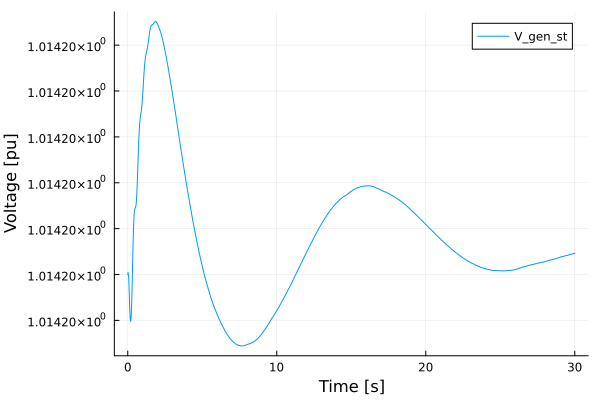

GKS: Possible loss of precision in routine SET_WINDOW


In [9]:
plot!(series2, label = "V_gen_st", xlabel = "Time [s]", ylabel = "Voltage [pu]")